In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from tensorflow import keras
from keras.layers.core import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import gridspec

In [2]:
gdf = pd.read_csv('gdf_final.csv')
gdf.head()

,event_type,end_station_name,trip_date,trip_hour,usage_counts,delta_time,dist,avgtemp,population_16_years_and_over_with_earnings,median_earnings_(dollars),total_population,median_age_(years),white,black_or_african_american,american_indian_and_alaska_native,asian
0,Athletic,Pier 40 - Hudson River Park,2021-10-17,9,10,23.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
1,Athletic,Pier 40 - Hudson River Park,2021-10-17,10,13,22.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
2,Athletic,Pier 40 - Hudson River Park,2021-10-17,11,28,21.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
3,Athletic,Pier 40 - Hudson River Park,2021-10-17,12,24,20.041667,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
4,Athletic,Pier 40 - Hudson River Park,2021-10-17,13,34,19.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464


In [92]:
gdf.shape

(119734, 16)

In [113]:
class_mapping_event = {label:idx for idx,label in enumerate(np.unique(gdf['event_type']))}
class_mapping_station = {label:idx for idx,label in enumerate(np.unique(gdf['end_station_name']))}
gdf['event_type'] = gdf['event_type'].map(class_mapping_event)
gdf['end_station_name'] = gdf['end_station_name'].map(class_mapping_station)

In [117]:
gdf['trip_date'] = pd.to_datetime(gdf['trip_date'])
gdf['trip_date'] = gdf['trip_date'].apply(lambda x: (x - pd.to_datetime('2021-01-01')).days)

In [119]:
class_mapping_station

{'1 Ave & E 44 St': 0,
 '1 Ave & E 62 St': 1,
 '1 Ave & E 68 St': 2,
 '1 Ave & E 94 St': 3,
 '10 Ave & W 14 St': 4,
 '10 Ave & W 202 St': 5,
 '10 Ave & W 204 St': 6,
 '10 Ave & W 28 St': 7,
 '10 St & 7 Ave': 8,
 '11 Ave & W 27 St': 9,
 '19 St & 24 Ave': 10,
 '2 Ave & E 31 St': 11,
 '2 Ave & E 72 St': 12,
 '2 Ave & E 99 St': 13,
 '20 Ave & 38 St': 14,
 '21 St & Hoyt Ave S': 15,
 '24 St & 41 Ave': 16,
 '27 St & Hunter St': 17,
 '28 St & 36 Ave': 18,
 '28 St & 41 Ave': 19,
 '3 Ave & E 100 St': 20,
 '3 Ave & E 163 St': 21,
 '3 Ave & E 169 St': 22,
 '3 Ave & E 62 St': 23,
 '3 Ave & E 71 St': 24,
 '3 Ave & E 72 St': 25,
 '3 Ave & Schermerhorn St': 26,
 '3 Ave & Wakeman Pl': 27,
 '3 St & Prospect Park West': 28,
 '30 Ave & 21 St': 29,
 '30 Ave & 47 St': 30,
 '31 Ave & 14 St': 31,
 '31 St & 21 Ave': 32,
 '31 St & 23 Ave': 33,
 '31 St & Astoria Blvd': 34,
 '31 St & Broadway': 35,
 '31 St & Ditmars Blvd': 36,
 '31 St & Newtown Ave': 37,
 '34 Ave & 38 St': 38,
 '34 St & 35 Ave': 39,
 '34 St & 38 

In [118]:
gdf

,event_type,end_station_name,trip_date,trip_hour,usage_counts,delta_time,dist,avgtemp,population_16_years_and_over_with_earnings,median_earnings_(dollars),total_population,median_age_(years),white,black_or_african_american,american_indian_and_alaska_native,asian
0,0,528,289,9,10,23.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
1,0,528,289,10,13,22.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
2,0,528,289,11,28,21.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
3,0,528,289,12,24,20.041667,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
4,0,528,289,13,34,19.000000,0.001563,66.92,22705,95310.0,30344,37.6,26983,423,0,1464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119729,20,515,245,20,3,-14.000000,0.001638,69.62,52730,37226.0,99558,34.5,15922,67681,296,3072
119730,20,515,245,22,4,-16.000000,0.001638,69.62,52730,37226.0,99558,34.5,15922,67681,296,3072
119731,20,515,245,23,2,-17.000000,0.001638,69.62,52730,37226.0,99558,34.5,15922,67681,296,3072
119732,20,515,246,0,1,-18.000000,0.001638,71.78,52730,37226.0,99558,34.5,15922,67681,296,3072


In [120]:
factors=gdf.columns[:4]

In [121]:
x = np.array(gdf[factors])
y = gdf['usage_counts']
x_train, x_test = x[:100000],x[100000:]
y_train, y_test = y[:100000],y[100000:]

In [97]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [124]:
# Regression 
def baseline_model():
    model = Sequential()
    # basic 2-layer nn
    model.add(Dense(30, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=20, verbose=0)

In [127]:
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_train)

In [128]:
mse_krr = mean_squared_error(y_train, y_pred)
print(mse_krr)

47.47385358852097


In [136]:
kfold = KFold(n_splits=5)
results = cross_val_score(estimator, x_train, y_train, cv=kfold)#np.array(x_train), np.array(y_train)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Baseline: -53.29 (18.11) MSE


NameError: name 'result' is not defined

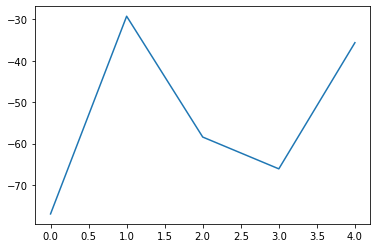

In [137]:
plt.plot(results)

In [126]:
model = Sequential()
model.add(Dense(30, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))   
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=100, batch_size=20, verbose=2)

Epoch 1/100
5000/5000 - 4s - loss: 55.7541 - accuracy: 0.2063 - val_loss: 47.6166 - val_accuracy: 0.3127
Epoch 2/100
5000/5000 - 3s - loss: 54.3474 - accuracy: 0.2061 - val_loss: 45.0166 - val_accuracy: 0.3080
Epoch 3/100
5000/5000 - 3s - loss: 53.6029 - accuracy: 0.2056 - val_loss: 43.4323 - val_accuracy: 0.3127
Epoch 4/100
5000/5000 - 3s - loss: 52.9353 - accuracy: 0.2055 - val_loss: 46.2763 - val_accuracy: 0.3127
Epoch 5/100
5000/5000 - 3s - loss: 52.4850 - accuracy: 0.2052 - val_loss: 47.2005 - val_accuracy: 0.3127
Epoch 6/100
5000/5000 - 3s - loss: 52.0719 - accuracy: 0.2050 - val_loss: 44.7695 - val_accuracy: 0.3118
Epoch 7/100
5000/5000 - 3s - loss: 51.7423 - accuracy: 0.2048 - val_loss: 47.5746 - val_accuracy: 0.3127
Epoch 8/100
5000/5000 - 3s - loss: 51.4864 - accuracy: 0.2047 - val_loss: 47.0635 - val_accuracy: 0.3126
Epoch 9/100
5000/5000 - 3s - loss: 51.2934 - accuracy: 0.2047 - val_loss: 49.5859 - val_accuracy: 0.3127
Epoch 10/100
5000/5000 - 3s - loss: 51.1155 - accuracy:

Epoch 79/100
5000/5000 - 3s - loss: 49.4404 - accuracy: 0.2029 - val_loss: 43.2645 - val_accuracy: 0.3091
Epoch 80/100
5000/5000 - 3s - loss: 49.3924 - accuracy: 0.2032 - val_loss: 46.4479 - val_accuracy: 0.3109
Epoch 81/100
5000/5000 - 3s - loss: 49.3936 - accuracy: 0.2033 - val_loss: 45.0260 - val_accuracy: 0.3109
Epoch 82/100
5000/5000 - 3s - loss: 49.3606 - accuracy: 0.2031 - val_loss: 45.5709 - val_accuracy: 0.3115
Epoch 83/100
5000/5000 - 3s - loss: 49.3297 - accuracy: 0.2028 - val_loss: 48.5265 - val_accuracy: 0.3118
Epoch 84/100
5000/5000 - 3s - loss: 49.3194 - accuracy: 0.2032 - val_loss: 45.0400 - val_accuracy: 0.2816
Epoch 85/100
5000/5000 - 3s - loss: 49.3066 - accuracy: 0.2027 - val_loss: 47.1311 - val_accuracy: 0.3113
Epoch 86/100
5000/5000 - 3s - loss: 49.2995 - accuracy: 0.2027 - val_loss: 45.0825 - val_accuracy: 0.3089
Epoch 87/100
5000/5000 - 3s - loss: 49.3320 - accuracy: 0.2025 - val_loss: 46.0104 - val_accuracy: 0.3109
Epoch 88/100
5000/5000 - 3s - loss: 49.2919 - 

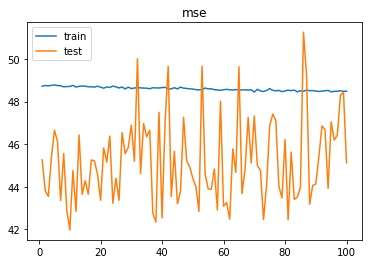

In [134]:
#change batch_size
history = model.fit(x_train, y_train, batch_size=25, epochs=100,verbose = 0,validation_data = (x_test,y_test))

df_h = pd.DataFrame(history.history)
epoch = pd.Series(df_h.index+1)
# Plot loss for train & test
plt.plot(epoch, df_h.iloc[:,0], label='train')
plt.plot(epoch, df_h.iloc[:,2], label='test')
plt.title('mse')
plt.legend()

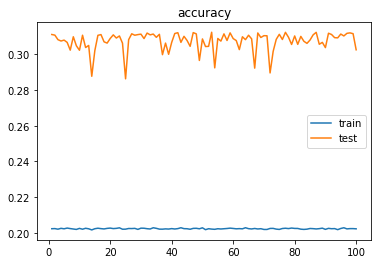

In [135]:
# Plot accuracy for train & test
plt.plot(epoch, df_h.iloc[:,1], label='train')
plt.plot(epoch, df_h.iloc[:,3], label='test')
plt.title('accuracy')
plt.legend()